In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import wordcloud as wc

In [5]:
(
    pd.read_csv('data/raw/train.tsv', sep='\t').Label.value_counts(), 
    pd.read_csv('data/raw/test.tsv', sep='\t').Label.value_counts(), 
    pd.read_csv('data/raw/dev.tsv', sep='\t').Label.value_counts()
)

(Label
 moderate          6019
 not depression    1971
 severe             901
 Name: count, dtype: int64,
 Label
 moderate          2169
 not depression     848
 severe             228
 Name: count, dtype: int64,
 Label
 moderate          2306
 not depression    1830
 severe             360
 Name: count, dtype: int64)

In [7]:
(
    pd.read_csv('data/raw/train.tsv', sep='\t').shape, 
    pd.read_csv('data/raw/test.tsv', sep='\t').shape, 
    pd.read_csv('data/raw/dev.tsv', sep='\t').shape
)

((8891, 3), (3245, 3), (4496, 3))

In [2]:
data_path = "data/raw/train.tsv"

df = pd.read_csv(data_path, sep='\t')

df.columns = [x.lower() for x in df.columns]

df.head()

,pid,text_data,label
0,train_pid_1,Waiting for my mind to have a breakdown once t...,moderate
1,train_pid_2,My new years resolution : I'm gonna get my ass...,moderate
2,train_pid_3,New year : Somone else Feeling like 2020 will ...,moderate
3,train_pid_4,"My story I guess : Hi, Im from Germany and my ...",moderate
4,train_pid_5,Sat in the dark and cried myself going into th...,moderate


In [6]:
df.label.value_counts()

label
moderate          6019
not depression    1971
severe             901
Name: count, dtype: int64

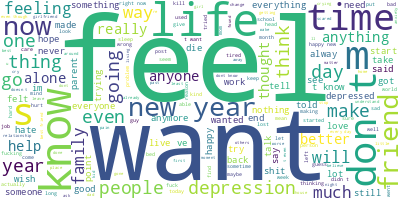

In [8]:
# make a wordcloud
text = " ".join(df.text_data.values)

wordcloud = wc.WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(text)

wordcloud.to_image()

In [19]:
# make a wordcloud for each label

for label in df.label.unique():
    text = " ".join(df[df.label == label].text_data.values)
    wordcloud = wc.WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(text)
    wordcloud.to_file(f"wordclouds/wordcloud_{label}.png")


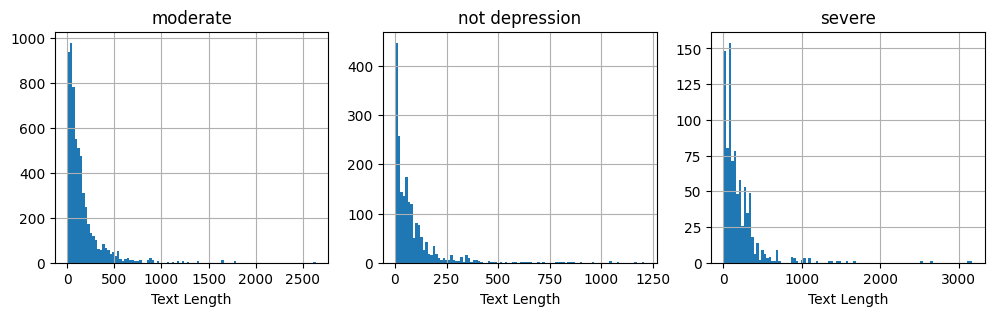

In [20]:
# count text length
df["text_length"] = df.text_data.apply(lambda x: len(x.split()))

# histogram of text length by label
n = len(df.label.unique())
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

for i, label in enumerate(df.label.unique()):
    df[df.label == label].text_length.hist(bins=100, ax=ax[i])
    ax[i].set_title(label)
    ax[i].set_xlabel("Text Length")